# Download Charts

<a href="https://colab.research.google.com/github/run-llama/llama_cloud_services/blob/main/examples/demo_get_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates how to download charts from a document using the JSON mode in LlamaParse.

JSON mode provides a wealth of data and metadata for each page of your document, including details about charts and images.

### Setup

Let's bring in our imports and set up our API keys.

In [ ]:
!pip install llama-index-core
!pip install llama-cloud-services

In [ ]:
# llama-parse is async-first, running the async code in a notebook requires the use of nest_asyncio
import nest_asyncio

nest_asyncio.apply()

import os

# API access to llama-cloud
os.environ["LLAMA_CLOUD_API_KEY"] = "llx-.."

### Download Data

Let's use [`AGENTLESS :
Demystifying LLM-based Software Engineering Agents`](https://arxiv.org/pdf/2407.01489) paper and download the charts present in the paper.

In [ ]:
!wget 'https://arxiv.org/pdf/2407.01489' -O "agentless.pdf"

--2024-12-09 20:36:45--  https://arxiv.org/pdf/2407.01489
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.67.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1384716 (1.3M) [application/pdf]
Saving to: ‘agentless.pdf’

agentless.pdf       100%[===================>]   1.32M  2.12MB/s    in 0.6s    

2024-12-09 20:36:45 (2.12 MB/s) - ‘agentless.pdf’ saved [1384716/1384716]



### Using LlamaParse in JSON Mode for PDF Reading to get charts.

Let's parse our document! 

We need to enable `extract_charts` parameter to get the charts present in the document.

In [ ]:
from llama_cloud_services import LlamaParse

parser = LlamaParse(extract_charts=True, invalidate_cache=True)
json_objs = parser.get_json_result("./agentless.pdf")

Started parsing the file under job_id 62360aa4-19b2-463b-ace5-da43bdd3e781


### Download Charts

We will use `get_charts` function to download the charts present in the document to `charts` folder.

In [ ]:
_ = parser.get_charts(json_objs, download_path="charts")

> Charts for page 1: []
> Charts for page 2: []
> Charts for page 3: []
> Charts for page 4: []
> Charts for page 5: [{'name': 'chart_p5_0.png', 'x': 108, 'y': 80.8, 'height': 203.95, 'width': 434.93}]
> Charts for page 6: []
> Charts for page 7: [{'name': 'chart_p7_0.png', 'x': 325.8, 'y': 387.22, 'height': 100.88, 'width': 178.3}]
> Charts for page 8: []
> Charts for page 9: []
> Charts for page 10: [{'name': 'chart_p10_0.png', 'x': 111.38, 'y': 347.69, 'height': 294.72, 'width': 389.24}]
> Charts for page 11: [{'name': 'chart_p11_0.png', 'x': 286.2, 'y': 223.57, 'height': 121, 'width': 217.81}]
> Charts for page 12: [{'name': 'chart_p12_0.png', 'x': 293.04, 'y': 332.08, 'height': 55.06, 'width': 204.12}, {'name': 'chart_p12_1.png', 'x': 293.04, 'y': 433.77, 'height': 63.66, 'width': 204.12}]
> Charts for page 13: [{'name': 'chart_p13_0.png', 'x': 304.65, 'y': 234.09, 'height': 72.04, 'width': 180.91}]
> Charts for page 14: [{'name': 'chart_p14_0.png', 'x': 345.6, 'y': 90.26, 'height

### Let's plot a randomly selected chart

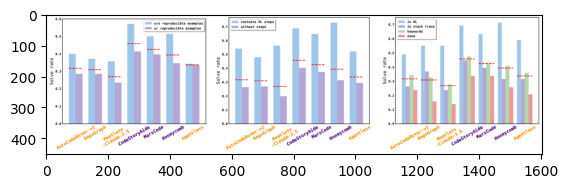

In [ ]:
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

# Use glob to list all PNG files in the folder
image_files = glob.glob("charts/*.png")

# Randomly select an image file
random_image = random.choice(image_files)

# Open and plot the image
img = Image.open(random_image)
plt.imshow(img)
plt.show()

Note: You can use `get_images` to download the images present in the document.